## 5.2.1 Sentiment Analysis

We will use the TextBlob library to perform sentiment analysis on the headlines. This will help us understand the general sentiment conveyed in the financial news.

In [3]:
# Import necessary libraries for sentiment analysis
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv('data/raw_analyst_ratings/raw_analyst_ratings.csv')

In [4]:

# Function to calculate sentiment polarity
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Apply the function to the 'headline' column
df['sentiment'] = df['headline'].apply(get_sentiment)

# Display the first few rows with sentiment scores
df[['headline', 'sentiment']].head()

,headline,sentiment
0,Stocks That Hit 52-Week Highs On Friday,0.0
1,Stocks That Hit 52-Week Highs On Wednesday,0.0
2,71 Biggest Movers From Friday,0.0
3,46 Stocks Moving In Friday's Mid-Day Session,0.0
4,B of A Securities Maintains Neutral on Agilent...,0.0


In [8]:
# Filter headlines with negative sentiment
negative_headlines = df[df['sentiment'] < 0][['headline', 'sentiment']]

# Display the first few rows of negative headlines
print(negative_headlines.head())

# Get the count of negative headlines
print(f"Total number of negative headlines: {len(negative_headlines)}")

                                             headline  sentiment
24  Agilent Reports Has Become Top-Level Sponsor O...  -0.200000
30  Int'l. Air Transport Authority Chief Economist...  -0.166667
39  Shares of several healthcare companies are tra...  -0.075000
43  Agilent Technologies Inc Says In January 2020,...  -0.089205
97  Shares of several healthcare companies are tra...  -0.093750
Total number of negative headlines: 131236


### Sentiment Distribution

Next, we'll visualize the distribution of sentiment scores to understand how sentiments are distributed across the dataset.

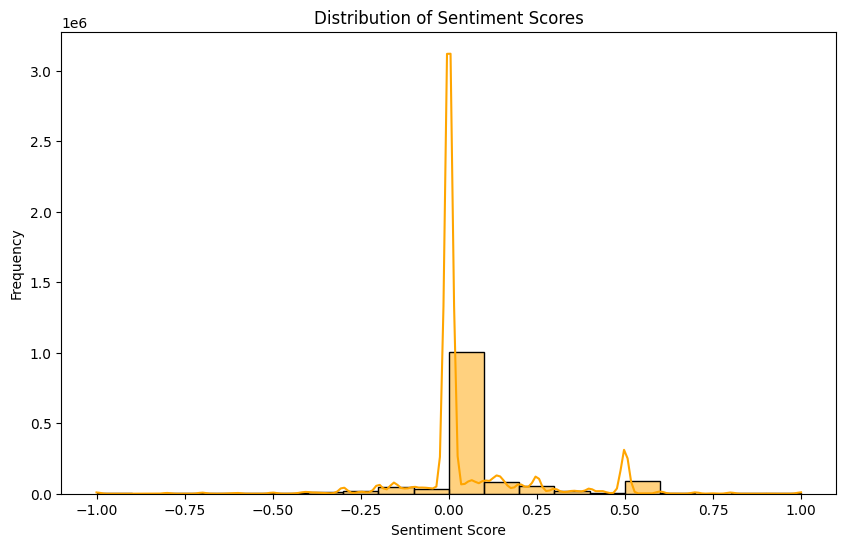

In [9]:
# Visualize the distribution of sentiment scores
plt.figure(figsize=(10, 6))
sns.histplot(df['sentiment'], bins=20, kde=True, color='orange')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

## 5.2.2 Topic Modeling

We will perform basic topic modeling by identifying the most common keywords or phrases within the headlines. This will help us understand the key themes in the financial news.

In [10]:
# Import necessary libraries for topic modeling
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

In [15]:
# Download stopwords if not already available
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\surafel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\surafel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\surafel\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [12]:
# Function to preprocess and tokenize headlines
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalpha() and word not in stopwords.words('english')]
    return tokens

In [16]:
# Apply the function to tokenize headlines
df['tokens'] = df['headline'].apply(preprocess_text)

# Flatten the list of tokens
all_tokens = [token for sublist in df['tokens'] for token in sublist]

# Get the most common tokens (keywords)
common_words = Counter(all_tokens).most_common(20)
common_words

[('stocks', 161702),
 ('vs', 138835),
 ('eps', 128801),
 ('est', 122289),
 ('shares', 114140),
 ('reports', 108688),
 ('update', 91645),
 ('market', 91080),
 ('earnings', 87183),
 ('sales', 79528),
 ('top', 78493),
 ('benzinga', 74466),
 ('pt', 73059),
 ('announces', 66531),
 ('price', 64217),
 ('buy', 63928),
 ('downgrades', 61942),
 ('trading', 61146),
 ('raises', 57793),
 ('upgrades', 56802)]

### Visualizing Common Keywords

We'll now visualize the most common keywords in the headlines.


In [ ]:
# Visualize the most common keywords
words, counts = zip(*common_words)
plt.figure(figsize=(10, 6))
sns.barplot(x=list(counts), y=list(words), palette='viridis')
plt.title('Most Common Keywords in Headlines')
plt.xlabel('Frequency')
plt.ylabel('Keyword')
plt.show()

## Key Findings from Text Analysis

### 1. Sentiment Analysis
- **Sentiment Distribution**: The sentiment scores of the headlines are distributed across a range of values, with many headlines having a neutral sentiment score of 0.
- **Negative Sentiment Count**: The total number of negative headlines is 131,236.
- **Visualization**: The distribution of sentiment scores shows that most headlines have a neutral sentiment, with fewer headlines having strongly positive or negative sentiments.

### 2. Common Keywords in Headlines
- **Top Keywords**: The most common keywords in the headlines are:
  - 'stocks': 161,702 occurrences
  - 'vs': 138,835 occurrences
  - 'eps': 128,801 occurrences
  - 'est': 122,289 occurrences
  - 'shares': 114,140 occurrences
  - 'reports': 108,688 occurrences
  - 'update': 91,645 occurrences
  - 'market': 91,080 occurrences
  - 'earnings': 87,183 occurrences
  - 'sales': 79,528 occurrences
- **Visualization**: The bar chart of the most common keywords shows that 'stocks' is the most frequently mentioned keyword, followed by 'vs' and 'eps'.